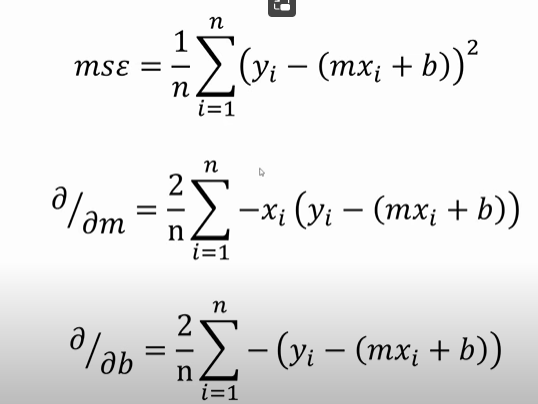

In [ ]:
import numpy as np

class LinearRegression:
    # y = m1x1 +m2x2 + m3x3+ .. + c
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.lr = learning_rate
        self.n_iter = num_iterations
        self.weights = None  # slope m
        self.bias = None # intercept c

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features) #array  no of slope m1,m2,m3 ... == no of features or columns or indep var
        self.bias = 0

        for _ in range(self.n_iter):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y)) # d/dm = 2/n*dot(xi(yi-(mxi+b)))
            db = (1 / num_samples) * np.sum(y_predicted - y)  # d/db = 2/n*(yi-(mxi+b))

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated




In [ ]:
# Example usage
X = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([2, 3, 5, 7, 11])

model = LinearRegression()
model.fit(X, y)
print("Weights:", model.weights)
print("Bias:", model.bias)

X_test = np.array([6]).reshape((1, -1))
y_pred = model.predict(X_test)
print("Predicted value:", y_pred)

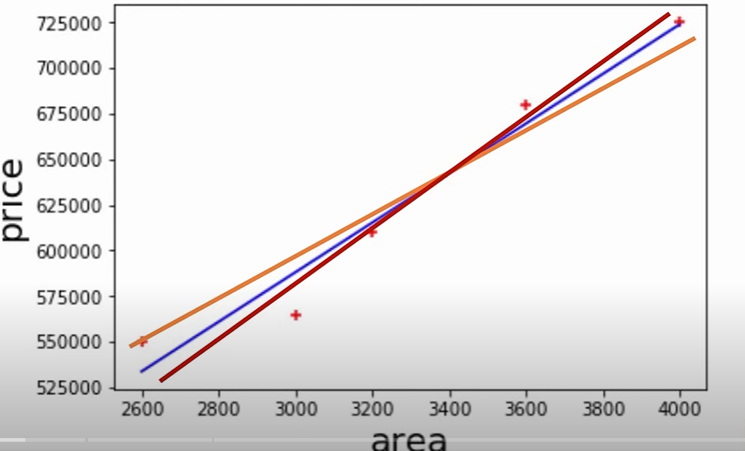

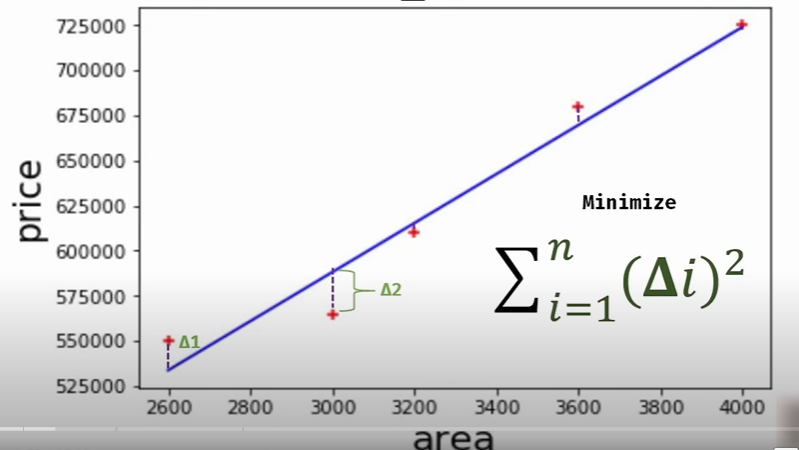

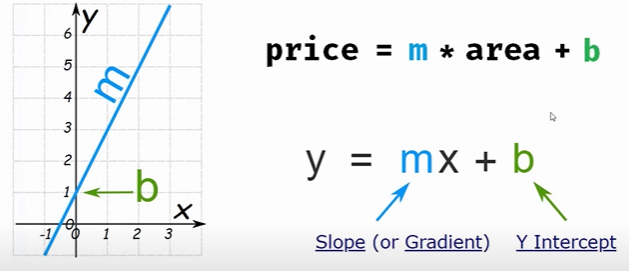

Problem Statement: Given above data build a machine learning model that can predict home prices based on square feet area

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
area_price = {"area":[2600,3000,3500,4000, 4500,5000,5500,6000] ,
              "price":[500000,550000,600000,650000,700000,750000,800000,850000]
             }

In [7]:
df = pd.DataFrame(area_price)

In [8]:
df.head(5)

,area,price
0,2600,500000
1,3000,550000
2,3500,600000
3,4000,650000
4,4500,700000


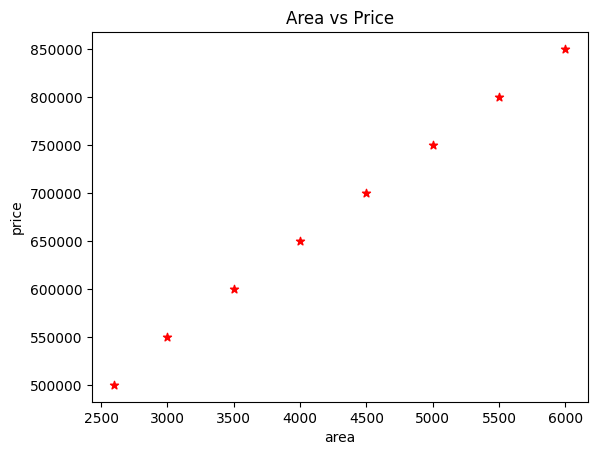

In [10]:
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.title('Area vs Price')
plt.scatter(df.area,df.price, color='red', marker="*")
plt.show()


In [16]:
x_train = df.drop('price', axis='columns')
x_train

,area
0,2600
1,3000
2,3500
3,4000
4,4500
5,5000
6,5500
7,6000


In [17]:
y_train = df.price
y_train

0    500000
1    550000
2    600000
3    650000
4    700000
5    750000
6    800000
7    850000
Name: price, dtype: int64

In [18]:
df.area

0    2600
1    3000
2    3500
3    4000
4    4500
5    5000
6    5500
7    6000
Name: area, dtype: int64

In [19]:
#create linear regression object 
model = linear_model.LinearRegression()
# fit the model with data
model.fit(x_train, y_train)

LinearRegression()

In [20]:
model.predict([[3300]]) # input must be in form of array

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([577174.84926787])

In [21]:
#slope
model.coef_

array([101.63652024])

In [22]:
model.intercept_

np.float64(241774.33247200696)

In [23]:
3300*101.63652024 + 241774.33247200696

577174.849264007

In [ ]:
df.to_csv("areas.csv")

In [48]:
areas_df = [ 1000,1500,2300,3540,4120,4560,5490,3460]

In [49]:
areas_df = np.array(areas_df)

In [50]:
areas_df

array([1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460])

In [53]:
arrr2d=areas_df.reshape(-1,1)

In [45]:
len(areas_df)

8

In [46]:
areas_df.reshape(len(areas_df),1) #rows , columns

array([[1000],
       [1500],
       [2300],
       [3540],
       [4120],
       [4560],
       [5490],
       [3460]])

with list of home price predictions

In [54]:
p = model.predict(arrr2d)

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
p

array([343410.85271318, 394229.11283376, 475538.3290267 , 601567.61412575,
       660516.79586563, 705236.86477175, 799758.82859604, 593436.69250646])

In [58]:
area = pd.DataFrame(areas_df, columns=['area'])

In [59]:
area

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460


In [60]:
area["pred_price"] = p

In [61]:
area

,area,pred_price
0,1000,343410.852713
1,1500,394229.112834
2,2300,475538.329027
3,3540,601567.614126
4,4120,660516.795866
5,4560,705236.864772
6,5490,799758.828596
7,3460,593436.692506


to create linear regression line

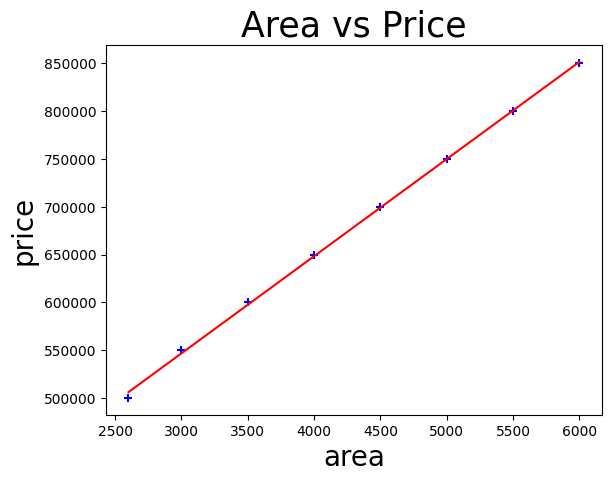

In [65]:
%matplotlib inline
plt.xlabel('area',fontsize = 20)
plt.ylabel('price',fontsize = 20)

plt.title('Area vs Price', fontsize = 25)
plt.scatter(df.area, df.price, color="blue", marker="+") # for actual price
# plt.plot(area.area,area.pred_price, color="red" )
plt.plot(df.area,model.predict(x_train), color="red" )




In [1]:
import pickle

In [2]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model, f)

NameError: name 'model' is not defined

In [ ]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [ ]:
mp.predict()

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(model,"model_joblib")

In [ ]:
mj = joblib.load("model_pickle")